## This notebook is meant to further investigate model performance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress
from bltools import letter_subplots
from scipy.spatial import distance

load up the performances of each model
- each of the performances are based on the model that experienced the minimum validation mean squared error

In [2]:
topHRperf_grey = "../TOPMODS/val_mse/hr_greyscale/QBC.csv"
topHRperf_red = "../TOPMODS/val_mse/hr_redscale/QBC.csv"
topRRperf_grey = "../TOPMODS/val_mse/rr_greyscale/QBC.csv"
topRRperf_red = "../TOPMODS/val_mse/rr_redscale/QBC.csv"
topHR_RRperf_grey = "../TOPMODS/val_mse/hr_rr_greyscale/QBC.csv"
topHR_RRperf_red  = "../TOPMODS/val_mse/hr_rr_redscale/QBC.csv"

perfs = [topHRperf_grey,topHRperf_red ,topRRperf_red, topRRperf_grey, topHR_RRperf_grey, topHR_RRperf_red]
perfnames =  'topHRperf_grey,topHRperf_red,topRRperf_red,topRRperf_grey,topHR_RRperf_grey,topHR_RRperf_red'.split(',')

In [3]:
experiment2perfdf = dict(zip(perfnames,[pd.read_csv(perf) for perf in perfs]))

Unpack some useful lists of values

In [4]:
HRg        = experiment2perfdf['topHRperf_grey'].QBC_hr.values.tolist()
HRr        = experiment2perfdf['topHRperf_red'].QBC_hr.values.tolist()
HR_RRg__HR = experiment2perfdf['topHR_RRperf_grey'].QBC_hr.values.tolist()
HR_RRr__HR = experiment2perfdf['topHR_RRperf_red'].QBC_hr.values.tolist()
HR_RRg__RR = experiment2perfdf['topHR_RRperf_grey'].QBC_rr.values.tolist()
HR_RRr__RR = experiment2perfdf['topHR_RRperf_red'].QBC_rr.values.tolist()
RRg        = experiment2perfdf['topRRperf_grey'].QBC_rr.values.tolist()
RRr        = experiment2perfdf['topRRperf_red'].QBC_rr.values.tolist()

HR_actual = experiment2perfdf['topHRperf_grey'].actual_hr.values.tolist()
RR_actual = experiment2perfdf['topRRperf_grey'].actual_rr.values.tolist()
cols = 'HRg,HRr,HR_RRg__HR,HR_RRr__HR,HR_RRg__RR,HR_RRr__RR,RRg,RRr'.split(',')


perfdf = pd.DataFrame(dict(zip(cols,[HRg,HRr,
                                     HR_RRg__HR,HR_RRr__HR,
                                     HR_RRg__RR,HR_RRr__RR,
                                     RRg,RRr])))

In [5]:
perfdf

,HRg,HRr,HR_RRg__HR,HR_RRr__HR,HR_RRg__RR,HR_RRr__RR,RRg,RRr
0,96.336723,96.608612,100.684937,91.313873,25.921896,24.963932,34.506329,26.634035
1,61.106365,60.577675,63.917419,77.693161,19.806232,22.938900,20.959431,25.015287
2,74.773361,63.781818,74.614304,80.838310,21.277245,28.016802,19.853979,20.950340
3,69.839767,74.771225,81.606667,68.949738,21.181307,23.664530,20.430311,19.148842
4,73.365242,79.375847,76.005867,67.936562,20.758062,23.895517,20.583622,20.351530
5,83.664459,79.465599,85.694916,77.182121,21.698246,25.170258,20.698967,25.100145
6,62.742535,57.599476,51.538155,76.924507,16.354155,21.558449,23.178926,22.651264
7,73.745934,66.579956,78.742897,73.162376,21.641808,25.350195,20.000395,24.353687
8,103.035149,98.693710,92.351860,86.441864,23.209007,26.362648,20.588232,25.438570
9,76.909554,77.458908,81.583443,76.312271,21.695110,25.611641,20.807646,25.231821


In [6]:
actual_hr = HR_actual
actual_rr = RR_actual

def compute_MSE(v1, v2):
    return np.mean((np.array(v1) - np.array(v2))**2)

def rmse(v1, v2):
    return np.sqrt(compute_MSE(v1,v2))

print("HR grey          mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_hr, HRg),rmse(actual_hr, HRg)))
print("HR red           mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_hr, HRr),rmse(actual_hr, HRr)))
print("RR grey          mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_rr, RRg),rmse(actual_rr, RRg)))
print("RR red           mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_rr, RRr),rmse(actual_rr, RRr)))
print("HR/RR (HR) grey  mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_hr, HR_RRg__HR),rmse(actual_hr, HR_RRg__HR)))
print("HR/RR (HR) red   mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_hr, HR_RRr__HR),rmse(actual_hr, HR_RRr__HR)))
print("HR/RR (RR) grey  mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_rr, HR_RRg__RR),rmse(actual_rr, HR_RRg__RR)))
print("HR/RR (RR) red   mse={:<10.3f} rmse={:<6.3f}".format(compute_MSE(actual_rr, HR_RRr__RR),rmse(actual_rr, HR_RRr__RR)))


HR grey          mse=33.371     rmse=5.777 
HR red           mse=99.655     rmse=9.983 
RR grey          mse=117.303    rmse=10.831
RR red           mse=93.921     rmse=9.691 
HR/RR (HR) grey  mse=199.695    rmse=14.131
HR/RR (HR) red   mse=130.016    rmse=11.402
HR/RR (RR) grey  mse=96.096     rmse=9.803 
HR/RR (RR) red   mse=86.874     rmse=9.321 


Defining some plotting related functions

In [7]:
def add_subplot_axes(ax,rect):
    """
    add subsubplot
    
    *=============================*
    |      *------*     __        |
    |      |subsub|    |  |       |
    |   _  |plot  |    |  |__     |
    |__|  |*------*  __|     |____|
    |     |_________|        |    |
    *==============================*
    """
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

def bland_altman(actual, predictions):
    actual, predictions = map(np.log2, map(np.array, [actual,predictions]))
    diff = actual - predictions
    avg  = (actual + predictions)/2
    
    return avg, diff

Draw HR performance plot

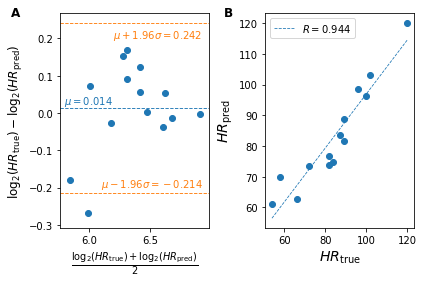

In [8]:
slope, intercept, r, p, err = linregress(HR_actual, HRg)
def fit(X):
    return slope*X + intercept

Xs = np.arange(min(HR_actual), max(HR_actual)+1)
layout = (2,4)
fig = plt.figure()
[ax, ax2] = [plt.subplot2grid(layout, (0,0), colspan=2, rowspan=2),
             plt.subplot2grid(layout, (0,2), rowspan=2, colspan=2)]

letter_subplots([ax, ax2], xoffset=[-0.3, -0.25], yoffset=[1., 1.])

ax2.scatter(HR_actual, HRg)
ax2.plot(Xs, fit(Xs), label=rf"$R={round(r,3)}$", linestyle='--', linewidth=0.8)
ax2.set_ylabel("$HR_{\mathrm{pred}}$", fontsize=14)
ax2.set_xlabel("$HR_{\mathrm{true}}$", fontsize=14)
ax2.legend(frameon=True)
avg, diff = bland_altman(HR_actual, HRg)
std_diff196 = np.std(diff)*1.96
plus = np.mean(diff) + std_diff196
minus = np.mean(diff) - std_diff196

kwds = {'linestyle':'--','linewidth':0.9}
ax.scatter(avg, diff)
ax.text(5.8, np.mean(diff) + 0.01, rf"$\mu= {round(np.mean(diff),3)}$", color="C0")
ax.text(6.2,0.2,rf"$\mu + 1.96\sigma={round(plus,3)}$", color="C1")
ax.text(6.1,-0.2,rf"$\mu - 1.96\sigma={round(minus,3)}$", color="C1")
ax.set_xlabel(r"$\frac{\log_{2}(HR_{\mathrm{true}}) + \log_{2}(HR_{\mathrm{pred}})}{2}$", fontsize=14)
ax.set_ylabel(r"$\log_{2}(HR_{\mathrm{true}}) - \log_{2}(HR_\mathrm{pred})$", fontsize=12)
ax.axhline(np.mean(diff), **kwds)
ax.axhline(plus, **kwds, color="C1")
ax.axhline(minus, **kwds, color="C1")
plt.tight_layout(w_pad=0.4)
plt.savefig("figs/HRperformance_grey_mse.pdf")
plt.show()

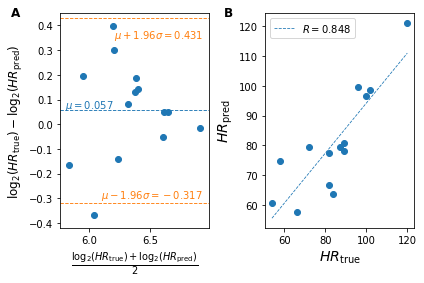

In [9]:
slope, intercept, r, p, err = linregress(HR_actual, HRr)
def fit(X):
    return slope*X + intercept

Xs = np.arange(min(HR_actual), max(HR_actual)+1)
layout = (2,4)
fig = plt.figure()
[ax, ax2] = [plt.subplot2grid(layout, (0,0), colspan=2, rowspan=2),
             plt.subplot2grid(layout, (0,2), rowspan=2, colspan=2)]

letter_subplots([ax, ax2], xoffset=[-0.3, -0.25], yoffset=[1., 1.])

ax2.scatter(HR_actual, HRr)
ax2.plot(Xs, fit(Xs), label=rf"$R={round(r,3)}$", linestyle='--', linewidth=0.8)
ax2.set_ylabel("$HR_{\mathrm{pred}}$", fontsize=14)
ax2.set_xlabel("$HR_{\mathrm{true}}$", fontsize=14)
ax2.legend(frameon=True)
avg, diff = bland_altman(HR_actual, HRr)
std_diff196 = np.std(diff)*1.96
plus = np.mean(diff) + std_diff196
minus = np.mean(diff) - std_diff196

kwds = {'linestyle':'--','linewidth':0.9}
ax.scatter(avg, diff)
ax.text(5.8, np.mean(diff) + 0.01, rf"$\mu= {round(np.mean(diff),3)}$", color="C0")
ax.text(6.2,0.35,rf"$\mu + 1.96\sigma={round(plus,3)}$", color="C1")
ax.text(6.1,-0.3,rf"$\mu - 1.96\sigma={round(minus,3)}$", color="C1")
ax.set_xlabel(r"$\frac{\log_{2}(HR_{\mathrm{true}}) + \log_{2}(HR_{\mathrm{pred}})}{2}$", fontsize=14)
ax.set_ylabel(r"$\log_{2}(HR_{\mathrm{true}}) - \log_{2}(HR_\mathrm{pred})$", fontsize=12)
ax.axhline(np.mean(diff), **kwds)
ax.axhline(plus, **kwds, color="C1")
ax.axhline(minus, **kwds, color="C1")
plt.tight_layout(w_pad=0.4)
plt.savefig("figs/HRperformance_red_mse.pdf")
plt.show()

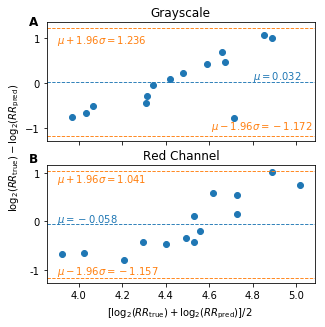

Correlation in preds RR gray: -0.16102944019701734
Correlation in preds RR red:0.02533939710370303


In [10]:
slope, intercept, r, p, err = linregress(RR_actual, RRg)
def fit(X):
    return slope*X + intercept

slope_r, intercept_r, rr, pr, errr = linregress(RR_actual, RRr)
def fitred(X):
    return slope_r*X + intercept_r
    

Xs = np.arange(min(RR_actual), max(RR_actual)+1)
layout=(2,4)
#fig = plt.figure(figsize=(6.4*0.75, 4.8))
fig, [ax, ax2] = plt.subplots(2,1,figsize=(6.4*0.75, 4.8), sharex=True)   #= [plt.subplot2grid(layout, (0,0), colspan=2, rowspan=2),
                #  plt.subplot2grid(layout, (0,2), rowspan=2, colspan=2)]
                       #plt.subplot2grid(layout, (2,2), rowspan=2, colspan=2)]
kwds = {'linestyle':'--','linewidth':0.9}

letter_subplots([ax, ax2], xoffset=[-0.05, -0.05], yoffset=[1.01, 1.05])

avg, diff = bland_altman(RR_actual, RRg)
std_diff196 = np.std(diff)*1.96
plus = np.mean(diff) + std_diff196
minus = np.mean(diff) - std_diff196

ax.scatter(avg, diff)
# mu{roun
ax.text(4.8, np.mean(diff) + 0.05, "$\mu = {}$".format(round(np.mean(diff),3)), color="C0")
# mu +
ax.text(3.9,0.89,rf"$\mu + 1.96\sigma={round(plus,3)}$", color="C1")
# mu -
ax.text(4.61,-1.02,rf"$\mu - 1.96\sigma={round(minus,3)}$", color="C1")
#ax.text(0, r"$\log_{2}(RR_{\mathrm{true}}) - \log_{2}(RR_\mathrm{pred})$", fontsize=12)
ax.axhline(np.mean(diff), **kwds)
ax.axhline(plus, **kwds, color="C1")
ax.axhline(minus, **kwds, color="C1")
ax.set_title("Grayscale")

avg, diff = bland_altman(RR_actual, RRr)
std_diff196 = np.std(diff)*1.96
plus = np.mean(diff) + std_diff196
minus = np.mean(diff) - std_diff196
ax2.set_yticks([-1,0,1])
ax2.set_yticklabels([-1,0,1])
ax2.scatter(avg, diff)
# mu
ax2.text(3.9, np.mean(diff) + 0.05, rf"$\mu = {round(np.mean(diff),3)}$", color="C0")
# mu +
ax2.text(3.9,0.8,rf"$\mu + 1.96\sigma={round(plus,3)}$", color="C1")
# mu -
ax2.text(3.9,-1.09,rf"$\mu - 1.96\sigma={round(minus,3)}$", color="C1")
ax2.axhline(np.mean(diff), **kwds)
ax2.axhline(plus, **kwds, color="C1")
ax2.axhline(minus, **kwds, color="C1")
ax2.set_title("Red Channel")

fig.text(0.01, 0.52, r'$\log_{2}(RR_{\mathrm{true}}) - \log_{2}(RR_{\mathrm{pred}})$', va='center', rotation='vertical')
fig.text(0.3 ,0.04, r"$[\log_{2}(RR_{\mathrm{true}}) + \log_{2}(RR_{\mathrm{pred}})]/2$", va='center')
#plt.tight_layout(w_pad=1.5)
#plt.subplots_adjust(top=1)#left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
plt.savefig("figs/RRperformance_mse.pdf")
plt.show()
print(rf'Correlation in preds RR gray: {r}')
print(rf"Correlation in preds RR red:{rr}")

In [11]:
#HR_RRg__HR, HR_RRg__RR, HR_RRr__HR, HR_RRr__RR
simul_df_hr = pd.DataFrame({'actual_hr':HR_actual, 'grey':HR_RRg__HR, 'red':HR_RRr__HR})
simul_df_rr = pd.DataFrame({'actual_rr':RR_actual, 'grey':HR_RRg__RR, 'red':HR_RRr__RR})

In [12]:
simul_df_hr

,actual_hr,grey,red
0,100.0,100.684937,91.313873
1,54.0,63.917419,77.693161
2,84.0,74.614304,80.838310
3,58.0,81.606667,68.949738
4,72.0,76.005867,67.936562
5,87.0,85.694916,77.182121
6,66.0,51.538155,76.924507
7,82.0,78.742897,73.162376
8,102.0,92.351860,86.441864
9,82.0,81.583443,76.312271


In [13]:
simul_df_rr['SE_red'] = (simul_df_rr['actual_rr'] - simul_df_rr['red'])**2
simul_df_rr['SE_grey'] = (simul_df_rr['actual_rr'] - simul_df_rr['grey'])**2

In [14]:
print(simul_df_rr['SE_red'].mean())
print(simul_df_rr['SE_grey'].mean())

86.87382961283323
96.09550021109708


In [15]:
simul_df_hr['SE_red'] = (simul_df_hr['actual_hr'] - simul_df_hr['red'])**2
simul_df_hr['SE_grey'] = (simul_df_hr['actual_hr'] - simul_df_hr['grey'])**2

In [16]:
print(simul_df_hr['SE_red'].mean())
print(simul_df_hr['SE_grey'].mean())

130.01613068823016
199.69529996651025


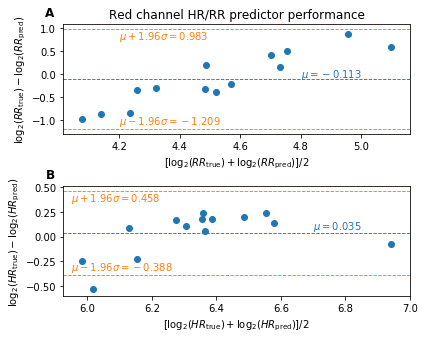

In [28]:
fig, [ax1, ax2] = plt.subplots(2,figsize=(6.4*0.75*1.25, 4.8))
letter_subplots([ax1,ax2],xoffset=[-0.038,-0.038], yoffset=[1.1,1.1])

avg, diff = bland_altman(RR_actual, simul_df_rr['red'].values.tolist())
mean_RR = np.mean(diff)
plus = mean_RR + np.std(diff)*1.96
minus = mean_RR - np.std(diff)*1.96

#ax1.set_title("Respiratory Rate")
ax1.set_xlabel(r"$[\log_{2}(RR_{\mathrm{true}}) + \log_{2}(RR_{\mathrm{pred}})]/2$")
ax1.scatter(avg, diff)
ax1.axhline(plus, **kwds,color="C1")
ax1.axhline(mean_RR, **kwds)
ax1.axhline(minus, **kwds, color="C1")
# plus
ax1.text(4.2,0.75, rf"$\mu + 1.96\sigma={round(plus,3)}$", color="C1")
# minus
ax1.text(4.2,-1.1, rf"$\mu - 1.96\sigma={round(minus,3)}$", color="C1")
# mu
ax1.text(4.8, mean_RR + 0.04, rf"$\mu={round(mean_RR, 3)}$",color="C0")

avg2, diff2 = bland_altman(HR_actual, simul_df_hr['red'].values.tolist())
mean_HR = np.mean(diff2)
plus2 = mean_HR + np.std(diff2)*1.96
minus2 = mean_HR - np.std(diff2)*1.96

#ax2.set_title("Heart Rate")
ax2.scatter(avg2, diff2)
ax2.axhline(plus2, **kwds,color="C1")
ax2.axhline(mean_HR, **kwds)
ax2.axhline(minus2, **kwds, color="C1")
# plus
ax2.text(5.95,plus2 - 0.1, rf"$\mu + 1.96\sigma={round(plus2,3)}$", color="C1")
# minus
ax2.text(5.95,minus2 + 0.05, rf"$\mu - 1.96\sigma={round(minus2,3)}$", color="C1")
# mu
ax2.text(6.7, mean_HR + 0.04, rf"$\mu={round(mean_HR, 3)}$",color="C0")

ax2.set_xlabel(r"$[\log_{2}(HR_{\mathrm{true}}) + \log_{2}(HR_{\mathrm{pred}})]/2$")
ax1.set_ylabel(r"$\log_{2}(RR_\mathrm{true}) - \log_{2}(RR_\mathrm{pred})$")
ax2.set_ylabel(r"$\log_{2}(HR_\mathrm{true}) - \log_{2}(HR_\mathrm{pred})$")

#plt.subplots_adjust(wspace=0.5)
ax1.set_title("Red channel HR/RR predictor performance")
plt.tight_layout()
plt.savefig("figs/HR_RR_performance_mse.pdf")
plt.show()